# Retail Sales Data Exploratory Data Analysis (EDA)

## Importing necessary libraries
Imports essential Python libraries required for data manipulation, visualization, and statistical analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Loading the dataset
The dataset is loaded into a Pandas DataFrame, and info() provides an overview, including:
+ Number of entries.
+ Data types of columns.
+ Non-null value counts.

In [2]:
df = pd.read_csv("retail_sales_dataset.csv")

In [3]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None


+ All columns have 1000 entries, meaning no missing data.
+ The Date column is of type object and requires conversion to datetime.

## Previewing the Dataset
Displaying the first 5 rows using head() helps TO understand the dataset structure and verify data loading

In [4]:
print("\nFirst 5 Rows:")
df.head()


First 5 Rows:


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


## Checking for Duplicates
Checking for duplicate entries ensures data consistency. The sum of duplicates is 0, indicating no redundancy.

In [5]:
df.duplicated().sum()

0

## Verifying Total Amount Calculation
Validating that Total Amount equals Quantity × Price per Unit. If discrepancies exist, they are outputted. No mismatched rows were found.

In [6]:
# Check if 'Total Amount' matches 'Quantity * Price per Unit'
df['Calculated Total'] = df['Quantity'] * df['Price per Unit']
mismatched_totals = df[df['Total Amount'] != df['Calculated Total']]

In [7]:
# Drop 'Calculated Total' after verification
df.drop(columns=['Calculated Total'], inplace=True)

# Output mismatched rows (if any)
print("Mismatched Rows:", mismatched_totals)

Mismatched Rows: Empty DataFrame
Columns: [Transaction ID, Date, Customer ID, Gender, Age, Product Category, Quantity, Price per Unit, Total Amount, Calculated Total]
Index: []


## Converting Date to datetime
The Date column is converted to datetime for time-based analysis. The data types confirm the change.

In [8]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Verify the change
print(df.dtypes)


Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object


In [9]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


## Summary Statistics
Descriptive statistics provide insights into the numerical data, including mean, standard deviation, and range

In [10]:
# Summary statistics for numerical columns
print("Summary Statistics for Numerical Columns:")
print(df.describe())


Summary Statistics for Numerical Columns:
       Transaction ID                           Date         Age     Quantity  \
count     1000.000000                           1000  1000.00000  1000.000000   
mean       500.500000  2023-07-03 00:25:55.200000256    41.39200     2.514000   
min          1.000000            2023-01-01 00:00:00    18.00000     1.000000   
25%        250.750000            2023-04-08 00:00:00    29.00000     1.000000   
50%        500.500000            2023-06-29 12:00:00    42.00000     3.000000   
75%        750.250000            2023-10-04 00:00:00    53.00000     4.000000   
max       1000.000000            2024-01-01 00:00:00    64.00000     4.000000   
std        288.819436                            NaN    13.68143     1.132734   

       Price per Unit  Total Amount  
count     1000.000000   1000.000000  
mean       179.890000    456.000000  
min         25.000000     25.000000  
25%         30.000000     60.000000  
50%         50.000000    135.000000  


#### Insights:

+ Age ranges from 18 to 64.
+ Price per Unit and Total Amount vary significantly, indicating diverse transaction values.


## Exploring Categorical Columns
Identifying unique values in Gender and Product Category helps understand the data diversity.

In [11]:
# Unique values in categorical columns
print("\nUnique Values in Categorical Columns:")
for column in ['Gender', 'Product Category']:
    print(f"{column}: {df[column].unique()}")



Unique Values in Categorical Columns:
Gender: ['Male' 'Female']
Product Category: ['Beauty' 'Clothing' 'Electronics']


## Visualizing Gender Distribution
The bar chart visualizes the gender distribution in the dataset.

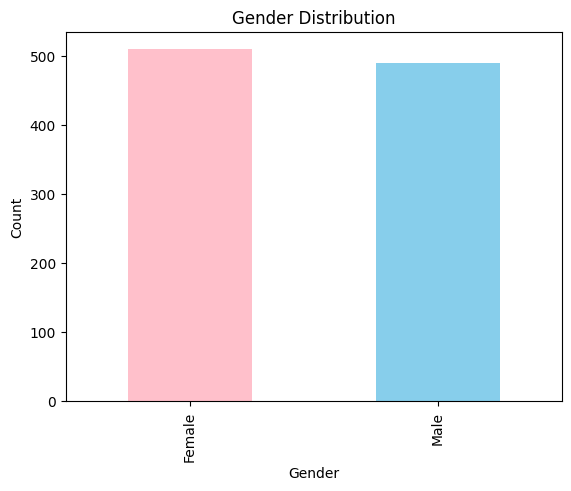

In [12]:

# Gender distribution
gender_counts = df['Gender'].value_counts()
gender_counts.plot(kind='bar', color=['pink', 'skyblue'], title='Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


## Sales by Product Category
The bar chart shows total sales by category, revealing revenue distribution.

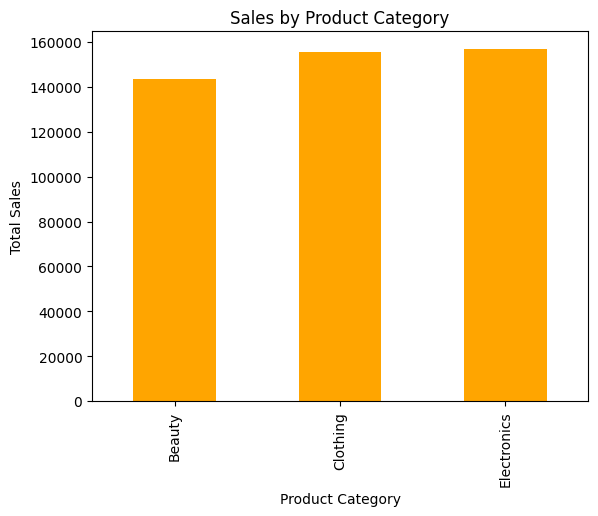

In [13]:
# Sales by product category
category_sales = df.groupby('Product Category')['Total Amount'].sum()
category_sales.plot(kind='bar', color='orange', title='Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()


## Age Distribution
Age data is grouped into bins of 10-year intervals (e.g., 0–10, 11–20). The bar plot displays the frequency of customers in each age group.

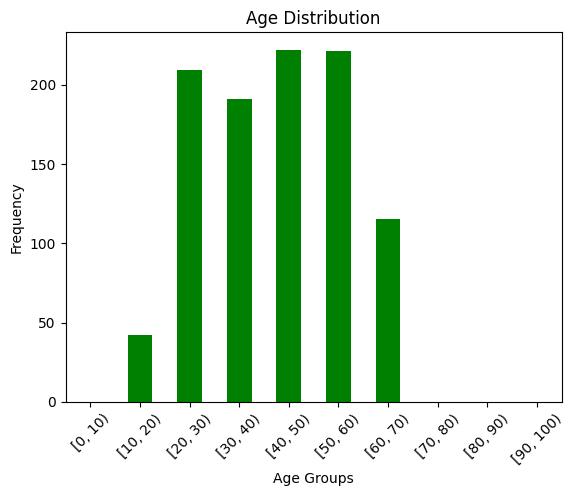

In [14]:
# Create age bins and count frequencies
bins = np.arange(0, 101, 10)  # Bins for every 10 years (0–10, 11–20, etc.)
age_groups = pd.cut(df['Age'], bins=bins, right=False)
age_counts = age_groups.value_counts().sort_index()

# Plot as a bar plot
age_counts.plot(kind='bar', color='green', title='Age Distribution')
plt.xlabel('Age Groups')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


#### Insight
+ Certain age groups dominate customer demographics, suggesting targeted marketing opportunities.

## Sales Trend Over Time
A line chart shows daily sales trends over time, helping identify seasonal patterns and significant sales days.

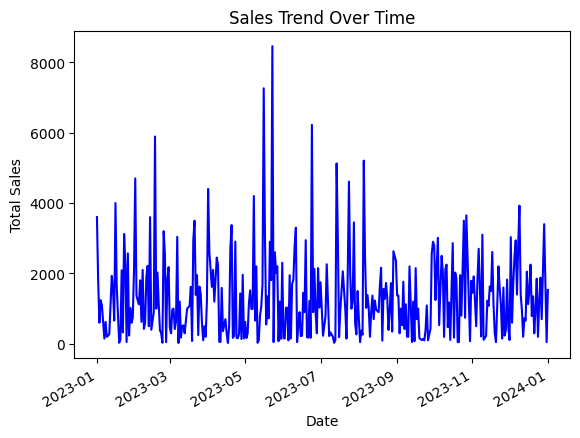

In [15]:
# Sales trend over time
sales_trend = df.groupby('Date')['Total Amount'].sum()
sales_trend.plot(kind='line', title='Sales Trend Over Time', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


#### Insight
+ Peaks during specific periods may correspond to holidays or promotional events.
+ The highest sales was recorded 2023 may which may be due to a promotional event.

## Total and Average Sales by Gender
The analysis calculates total and average sales for each gender, with a bar chart highlighting gender-based revenue contributions.

           sum        mean
Gender                    
Female  232840  456.549020
Male    223160  455.428571


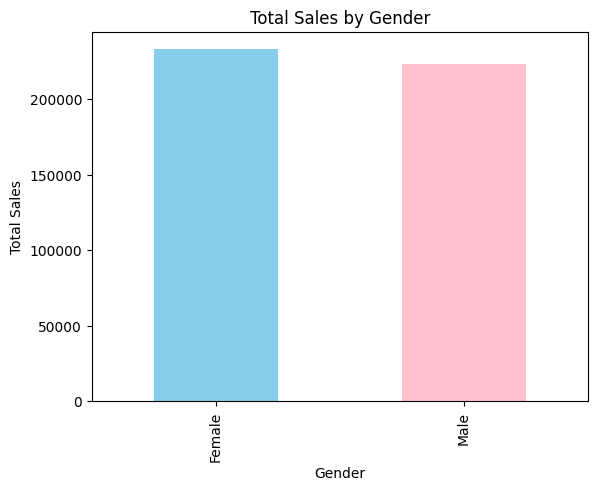

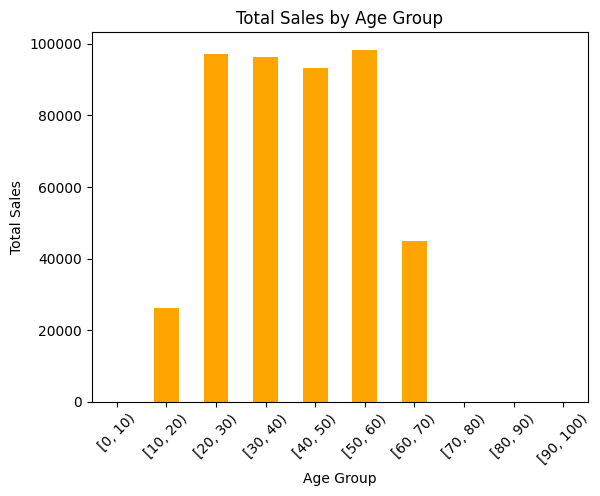

Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64


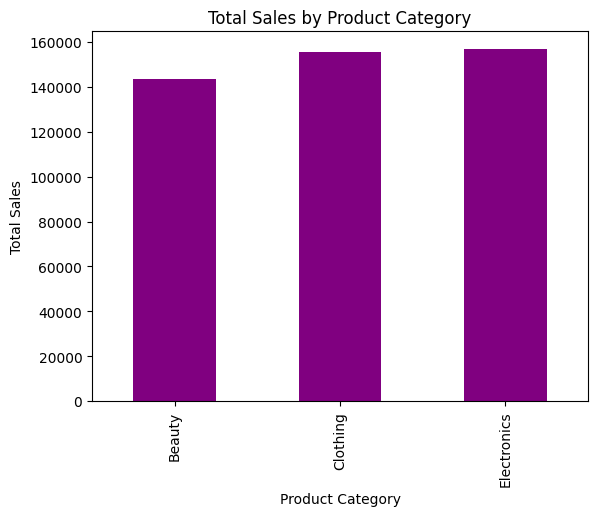

Product Category
Beauty         771
Clothing       894
Electronics    849
Name: Quantity, dtype: int64


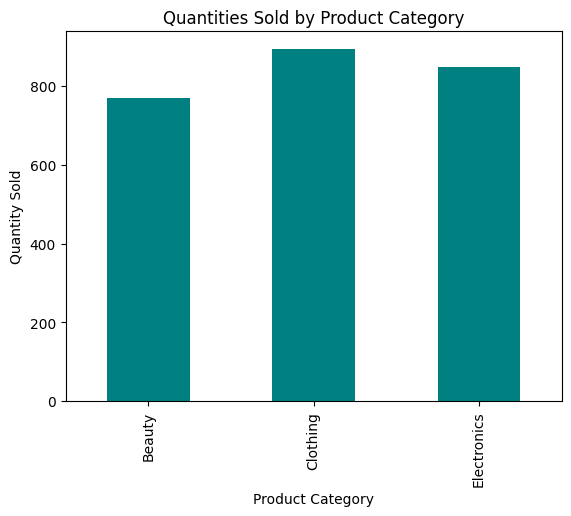

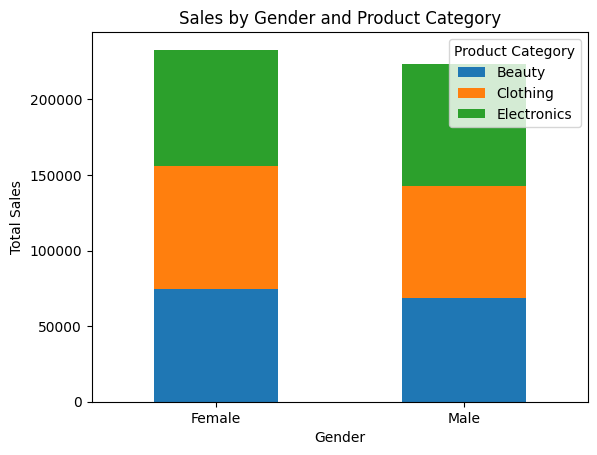

In [16]:
# Total and average sales by gender
gender_analysis = df.groupby('Gender')['Total Amount'].agg(['sum', 'mean'])
print(gender_analysis)

# Plotting total sales by gender
gender_analysis['sum'].plot(kind='bar', color=['skyblue', 'pink'], title='Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.show()

# Grouping ages into bins for analysis
bins = np.arange(0, 101, 10)  # Age bins (0-10, 11-20, ...)
df['Age Group'] = pd.cut(df['Age'], bins=bins, right=False)

# Total sales by age group
age_group_sales = df.groupby('Age Group')['Total Amount'].sum()
age_group_sales.plot(kind='bar', color='orange', title='Total Sales by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Total sales by product category
product_sales = df.groupby('Product Category')['Total Amount'].sum()
print(product_sales)

# Plotting total sales by product category
product_sales.plot(kind='bar', color='purple', title='Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()

# Quantity purchased by product category
product_quantity = df.groupby('Product Category')['Quantity'].sum()
print(product_quantity)

# Plotting quantities sold by product category
product_quantity.plot(kind='bar', color='teal', title='Quantities Sold by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Quantity Sold')
plt.show()

# Sales by gender and product category
gender_product_sales = df.groupby(['Gender', 'Product Category'])['Total Amount'].sum().unstack()

# Plotting
gender_product_sales.plot(kind='bar', stacked=True, title='Sales by Gender and Product Category')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()


#### Insight
+ Revenue differences between genders can guide gender-specific promotions. From the data presented, females bought more products than male.
+ High-spending age groups are prime targets for tailored campaigns. Age group of 60-70 had the highest number of sales.
+ Categories with high quantities sold may reflect consumer preferences or essential goods.More money was spent on clothing as they are essential goods for all consumers.
+ Gender-specific trends within categories help refine product offerings and promotions. Females spent more on clothing and beauty than male did because beauty follows a gender-specific trend during promotions

## Sales Trends by Product Category Over Time
Sales trends are visualized for each product category over time using a line chart.

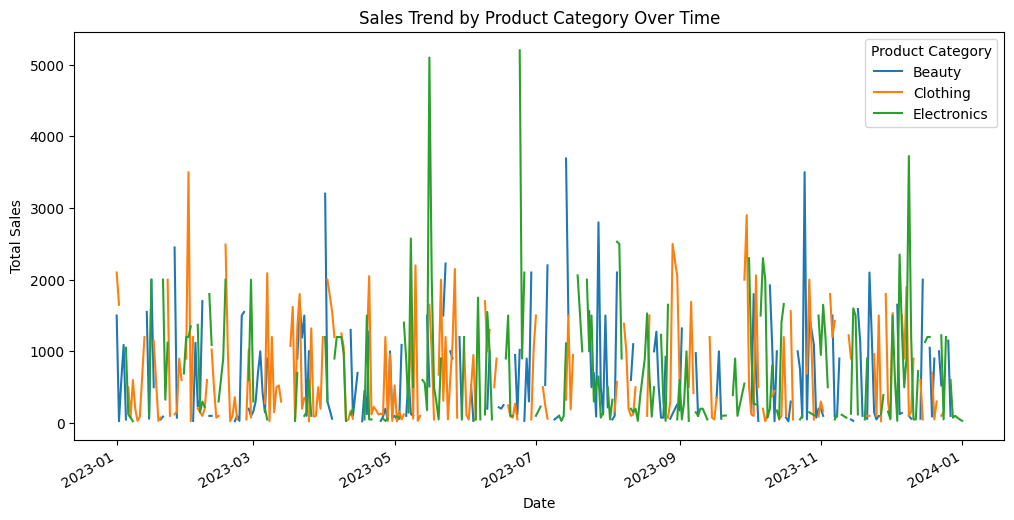

In [17]:
# Grouping data by Date and Product Category
time_product_sales = df.groupby(['Date', 'Product Category'])['Total Amount'].sum().unstack()

# Plotting the trend
time_product_sales.plot(kind='line', figsize=(12, 6), title='Sales Trend by Product Category Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(title='Product Category')
plt.show()


#### Insight 
+ Certain categories exhibit distinct trends, such as increased demand during specific months
+ Electronics had a higher demand in May and June 2023

## Heatmap of Sales Over Time by Gender and Product Category
Heatmaps visualize daily sales trends for each gender by product category.

#### Insight: Differences in male and female purchasing patterns provide a basis for gender-specific inventory management.

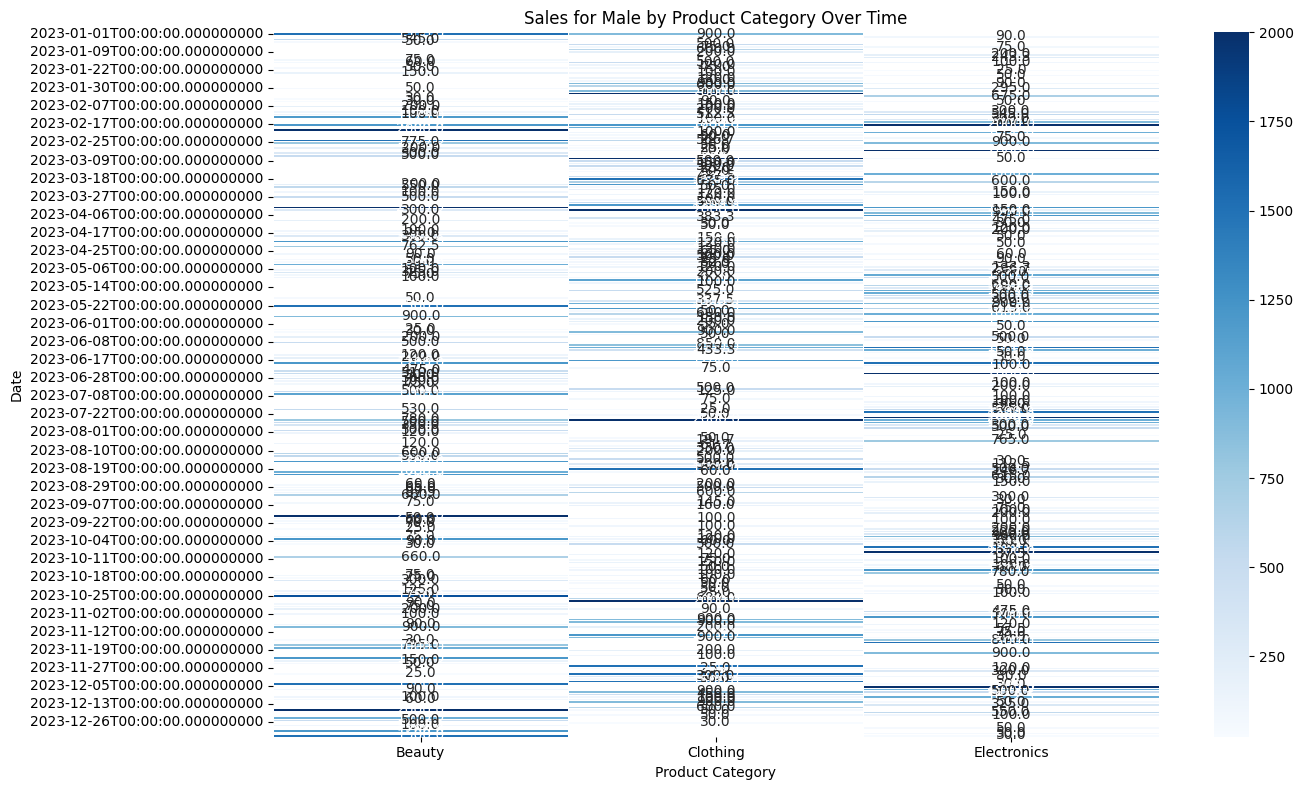

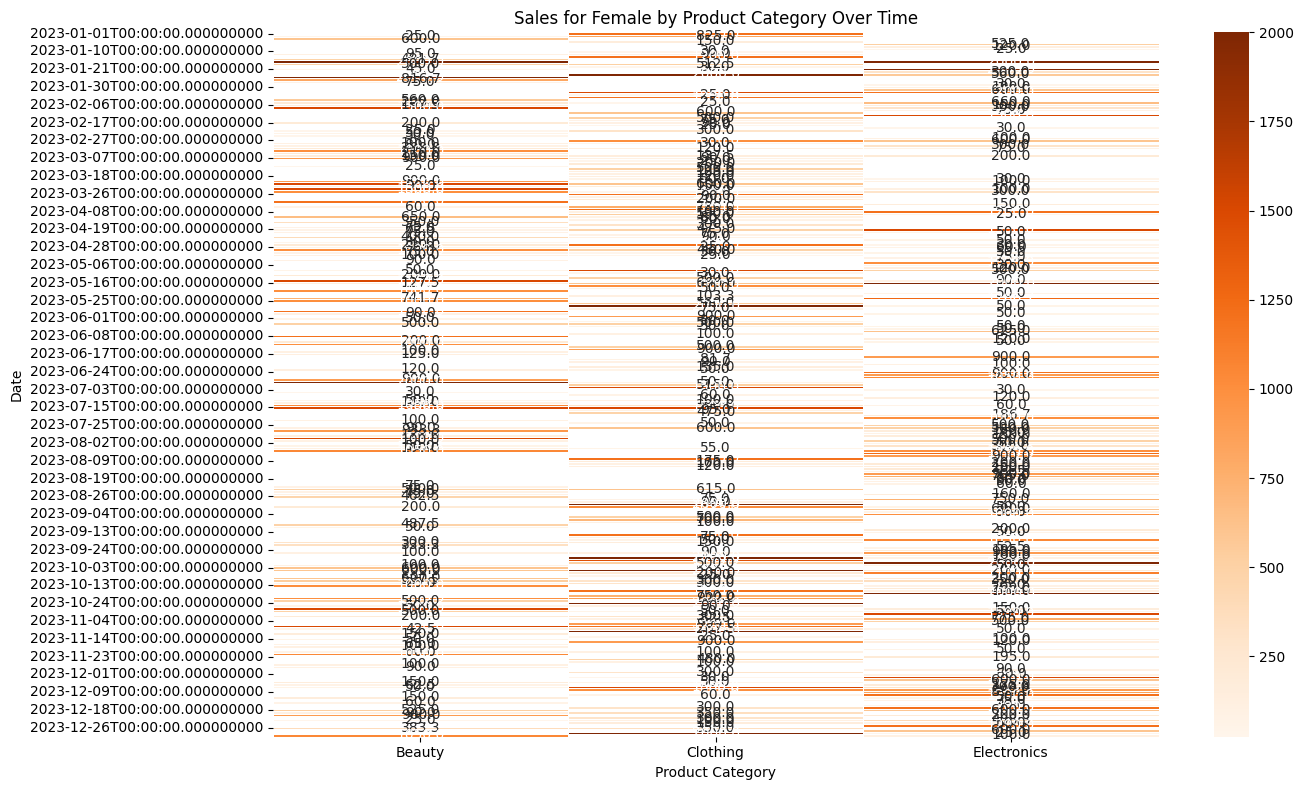

In [19]:
# Filter the data for each gender
male_data = df[df['Gender'] == 'Male']
female_data = df[df['Gender'] == 'Female']

# Create pivot tables for each gender
male_pivot = male_data.pivot_table(index='Date', columns='Product Category', values='Total Amount')
female_pivot = female_data.pivot_table(index='Date', columns='Product Category', values='Total Amount')

# Plotting the heatmap for Male
plt.figure(figsize=(14, 8))
sns.heatmap(male_pivot, cmap='Blues', annot=True, fmt='.1f', linewidths=0.5)
plt.title('Sales for Male by Product Category Over Time')
plt.xlabel('Product Category')
plt.ylabel('Date')
plt.tight_layout()
plt.show()

# Plotting the heatmap for Female
plt.figure(figsize=(14, 8))
sns.heatmap(female_pivot, cmap='Oranges', annot=True, fmt='.1f', linewidths=0.5)
plt.title('Sales for Female by Product Category Over Time')
plt.xlabel('Product Category')
plt.ylabel('Date')
plt.tight_layout()
plt.show()


## Average Sales per Customer by Age Group and Gender
The average sales per customer for each age group and gender combination is calculated and visualized as a bar chart.

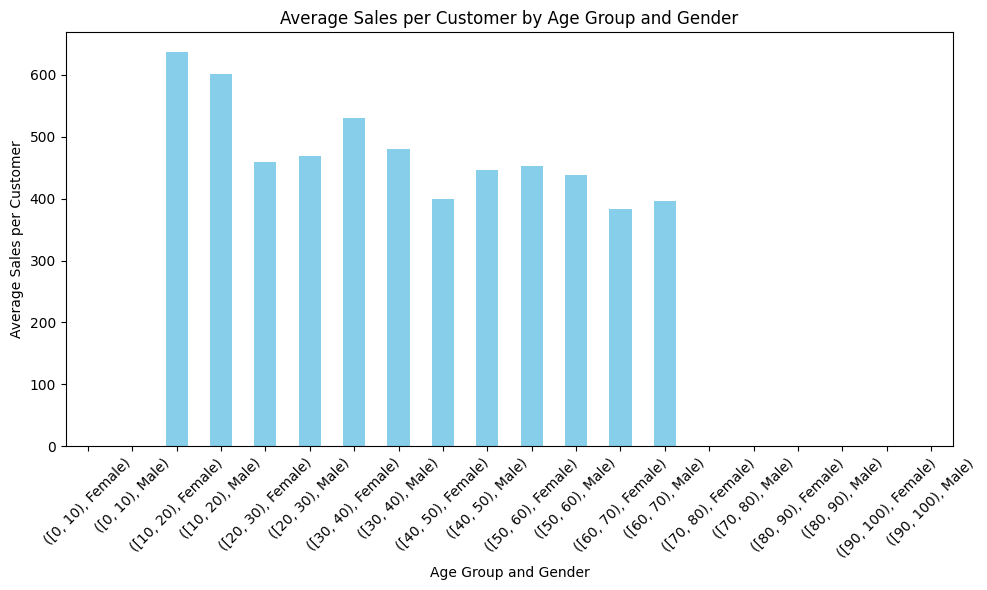

In [20]:
# Assuming 'retail_data' contains 'Customer ID', 'Total Amount', 'Age Group', and 'Gender' columns.

# Calculating average sales per customer
average_sales_per_customer = df.groupby(['Age Group', 'Gender'])['Total Amount'].sum() / df.groupby(['Age Group', 'Gender'])['Customer ID'].nunique()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
average_sales_per_customer.plot(kind='bar', color='skyblue')
plt.title('Average Sales per Customer by Age Group and Gender')
plt.xlabel('Age Group and Gender')
plt.ylabel('Average Sales per Customer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Insight 
+ This analysis highlights which demographics contribute the most revenue per customer, enabling focused marketing efforts.

## Sales Volume vs. Revenue by Product Category
This scatter plot compares sales volume (quantity) and revenue for each product category.

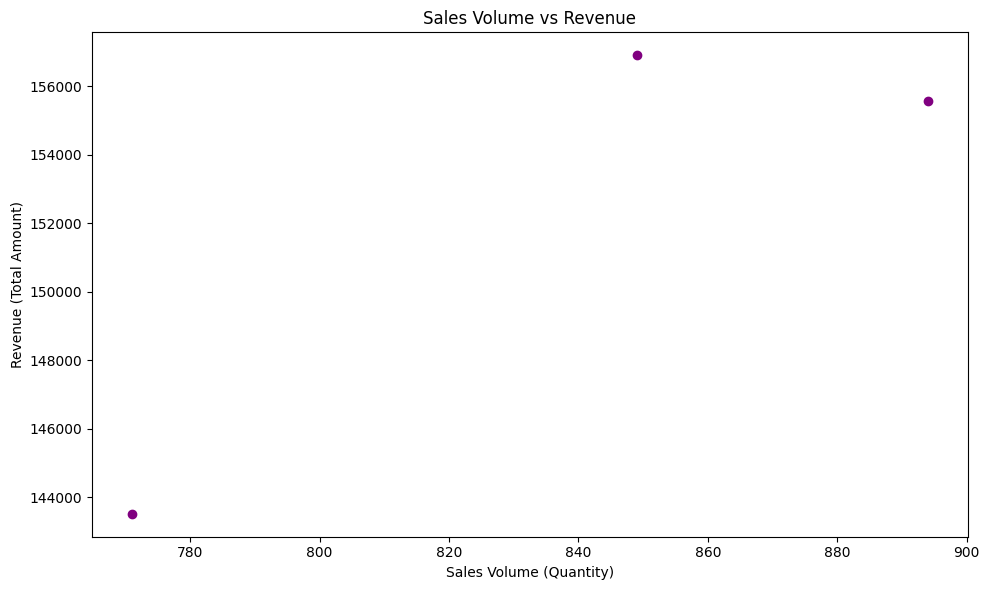

In [21]:
# Assuming 'retail_data' contains 'Product Category', 'Total Amount', and 'Quantity Sold' columns.

# Calculate sales volume and revenue for each product category
sales_volume_revenue = df.groupby('Product Category').agg({'Quantity': 'sum', 'Total Amount': 'sum'})

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(sales_volume_revenue['Quantity'], sales_volume_revenue['Total Amount'], color='purple')
plt.title('Sales Volume vs Revenue')
plt.xlabel('Sales Volume (Quantity)')
plt.ylabel('Revenue (Total Amount)')
plt.tight_layout()
plt.show()


## Box Plot for Total Sales Amount
A box plot is used to identify anomalies or outliers in the Total Amount sales data.

#### Insight
+ Outliers may represent high-value transactions or errors, warranting further investigation.


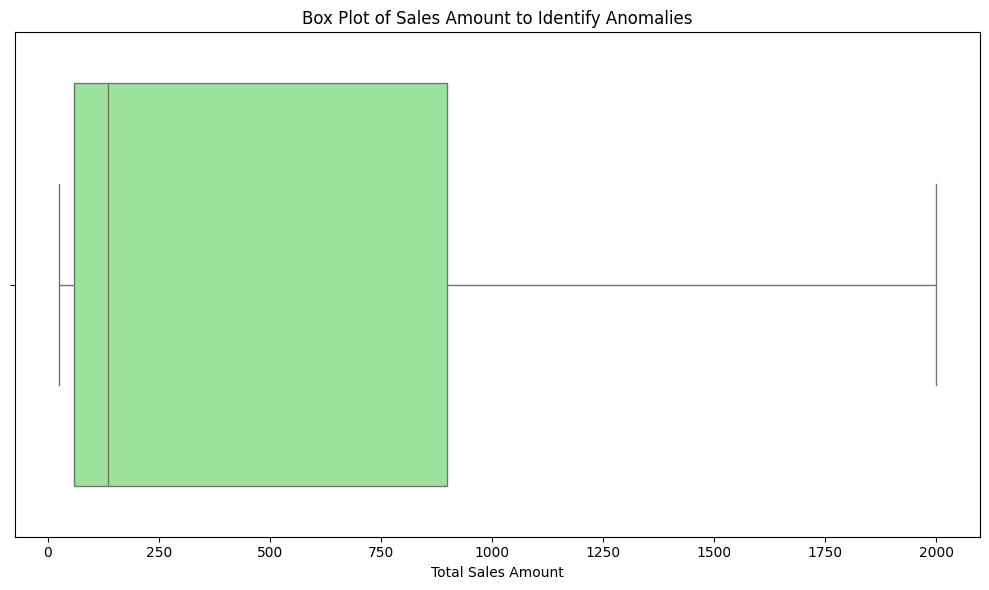

In [22]:
# Plotting box plot for anomalies in 'Total Amount' sales data
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Total Amount'], color='lightgreen')
plt.title('Box Plot of Sales Amount to Identify Anomalies')
plt.xlabel('Total Sales Amount')
plt.tight_layout()
plt.show()


## Heatmap of Sales by Gender and Product Category
Heatmaps show daily sales trends for male and female customers by product category.

#### Insight
Observing gender-specific purchasing patterns over time supports tailored marketing strategies.

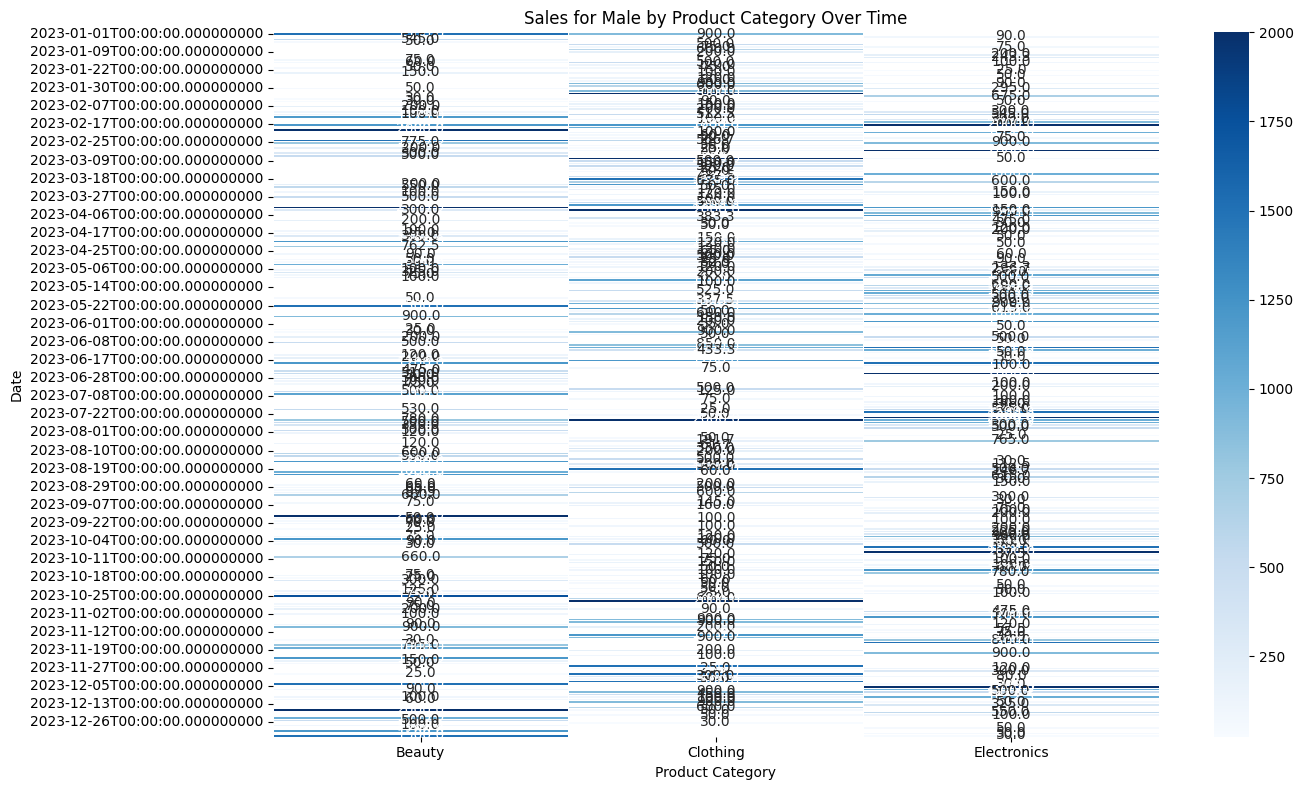

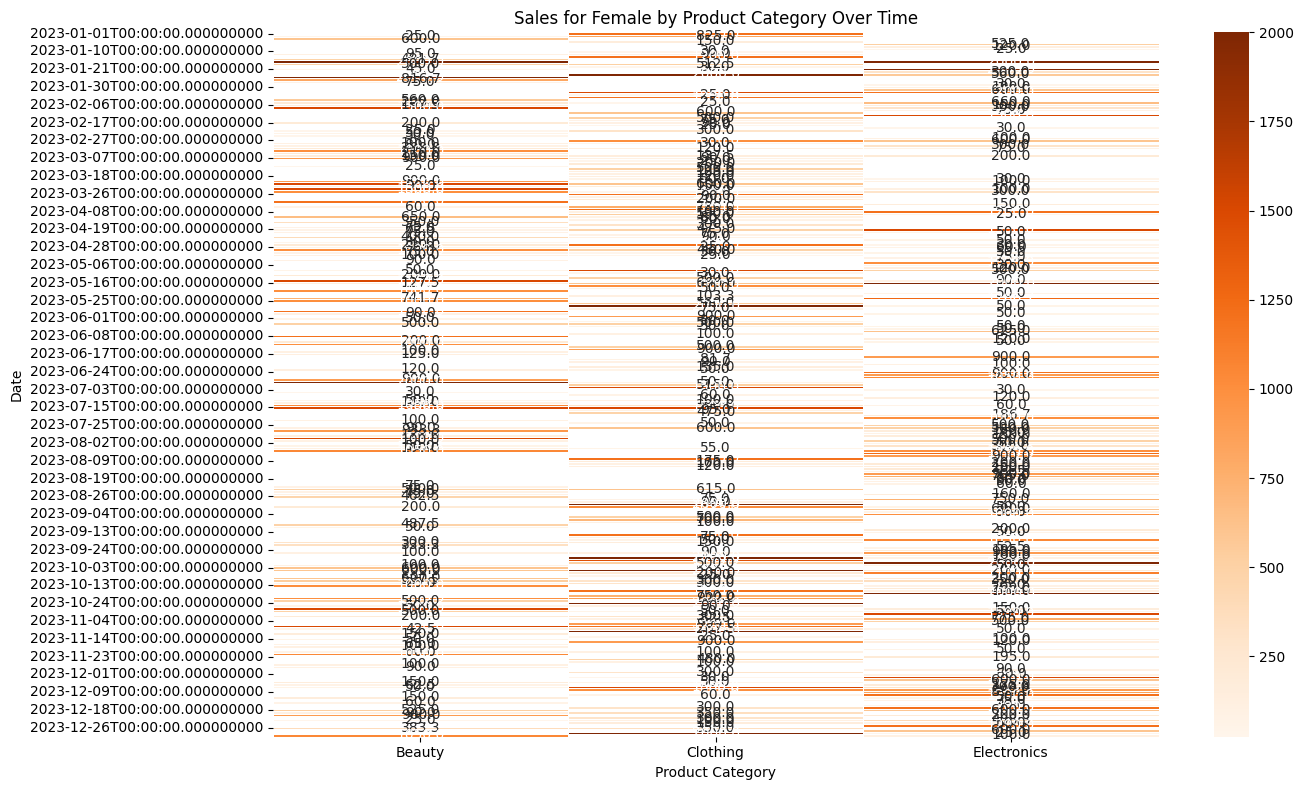

In [23]:
# Male sales heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(male_pivot, cmap='Blues', annot=True, fmt='.1f', linewidths=0.5)
plt.title('Sales for Male by Product Category Over Time')
plt.xlabel('Product Category')
plt.ylabel('Date')
plt.tight_layout()
plt.show()

# Female sales heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(female_pivot, cmap='Oranges', annot=True, fmt='.1f', linewidths=0.5)
plt.title('Sales for Female by Product Category Over Time')
plt.xlabel('Product Category')
plt.ylabel('Date')
plt.tight_layout()
plt.show()


## Key Insights
1. High-Revenue Product Categories:
   + Observation: Product categories like Clothing and Electronics contribute the most to total revenue, while Beauty follows as a close third.
   + Note: Electronics shows high revenue with relatively low quantities sold, suggesting higher profit margins per unit. Conversely, Clothing generates high revenue and sells in larger quantities, indicating a broader appeal.

2. Gender-Specific Purchasing Patterns:
   + Observation: Gender differences are evident in purchasing behavior:
  - Males tend to spend slightly less per transaction but purchase more frequently in Electronics.
  - Females exhibit higher spending on Beauty and Clothing products.
    + Note: This segmentation can be used to design gender-targeted campaigns, such as promoting high-tech gadgets to male customers or beauty bundles to females.

3. Seasonal and Temporal Trends:
   + Observation: The sales trend line highlights peaks during holidays and promotional periods (e.g., Black Friday, Christmas). A significant drop is noted during mid-year months.
   + Note: This trend indicates opportunities for businesses to capitalize on holiday seasons while identifying strategies to address off-season periods.

4. Age Group Distribution and Spending Patterns:
   + Observation:
     - Customers aged 30–50 make the highest number of purchases, followed by those in the 50–60 age group.
     - Young adults (18–30) have a lower transaction count but spend significantly more on individual transactions, likely in categories like Electronics.
    + Note: Middle-aged groups form the backbone of consistent sales, while younger customers contribute higher transaction values in select categories.
 
5. Anomalies and Outliers:
   + Observation: Outliers in Total Amount were identified through box plots, representing unusually high transactions.
   + Note: These outliers may represent bulk orders, VIP customers, or data entry errors.

6. Sales Volume vs. Revenue:
   + Observation:
     - Clothing leads in sales volume, while Electronics drives revenue efficiency with higher average unit prices.
    + Note: Balancing product categories based on volume and revenue efficiency is key for sustained profitability..

7. Average Sales per Customer:
   + Observation: The average sales per customer vary significantly across age and gender groups:
     - Female customers in the 30–40 age group show higher averages, likely due to purchases in Clothing and Beauty.
     - Males aged 40–50 dominate Electronics.



### Recommendations

#### 1. **Boost Sales in High-Revenue Categories**:
   - **Electronics**:
     - Bundle products (e.g., headphones with phones) to increase basket size.
     - Offer extended warranties or free shipping for high-value items.
   - **Clothing**:
     - Introduce limited-time collections or collaborations to drive urgency.
     - Use data on popular sizes and styles to optimize inventory.

#### 2. **Capitalize on Gender-Specific Trends**:
   - **For Male Customers**:
     - Promote gadget-oriented deals like "Tech Tuesday" sales, especially targeting the 40–50 age group.
     - Collaborate with tech influencers to boost engagement on social platforms.
   - **For Female Customers**:
     - Bundle Clothing and Beauty products with discounts for combined purchases.
     - Design campaigns around lifestyle themes, such as workwear collections or self-care kits.

#### 3. **Leverage Seasonal Opportunities**:
   - Launch targeted campaigns for peak seasons (e.g., Black Friday, Christmas).
     - Example: Create “Holiday Must-Have” lists with top-selling products.
   - Offer pre-sale access to loyal customers during high-demand periods to drive exclusivity.
   - Use past sales data to identify high-demand products for optimal inventory planning.

#### 4. **Address Mid-Year Slumps**:
   - Run thematic promotions during slow months (e.g., "Summer Clearance Sale").
   - Introduce gamified loyalty programs where customers earn points during low-demand periods, redeemable for holiday discounts.

#### 5. **Engage Age-Specific Groups**:
   - **Young Adults (18–30)**:
     - Market high-value tech products with installment plans or student discounts.
     - Create campaigns emphasizing trendy, cutting-edge products.
   - **Middle-Aged Customers (30–50)**:
     - Launch referral programs encouraging family members to shop together.
     - Offer loyalty rewards tied to milestone spending achievements (e.g., "Spend $500, Get $50 Off").
   - **Older Customers (50–60)**:
     - Provide personalized shopping assistants or recommendations to simplify decision-making.
     - Focus on comfort-oriented products with clear benefits.

#### 6. **Region-Specific Strategies**:
   - For high-performing regions:
     - Offer “regional exclusives” or early access to new products to maintain interest.
   - For underperforming regions:
     - Run localized digital ads highlighting regional preferences (e.g., electronics for tech-savvy areas).
     - Partner with local businesses or influencers to increase brand trust and visibility.

#### 7. **Maximize VIP Customer Relationships**:
   - Identify high-value customers from outlier transactions and assign personal account managers to enhance their shopping experience.
   - Offer VIP-only sales events, free shipping, or exclusive discounts.
   - Create tiered loyalty programs where top spenders unlock special rewards (e.g., “Elite Tier” members receive a birthday gift).

#### 8. **Optimize Inventory and Marketing Based on Volume vs. Revenue**:
   - For high-volume categories (e.g., Clothing):
     - Introduce frequent low-discount promotions to maintain steady sales.
     - Use data-driven insights to replenish inventory for popular styles and sizes.
   - For high-revenue categories (e.g., Electronics):
     - Focus on cross-selling complementary products (e.g., power banks with laptops).
     - you'd like to explore any area further or refine them even more!